Hello Kaggle! It is my first Competition

# Imports

In [1]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data_train = pd.read_csv("/kaggle/input/titanic/train.csv")
data_test = pd.read_csv("/kaggle/input/titanic/test.csv")
data_train

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Histograms

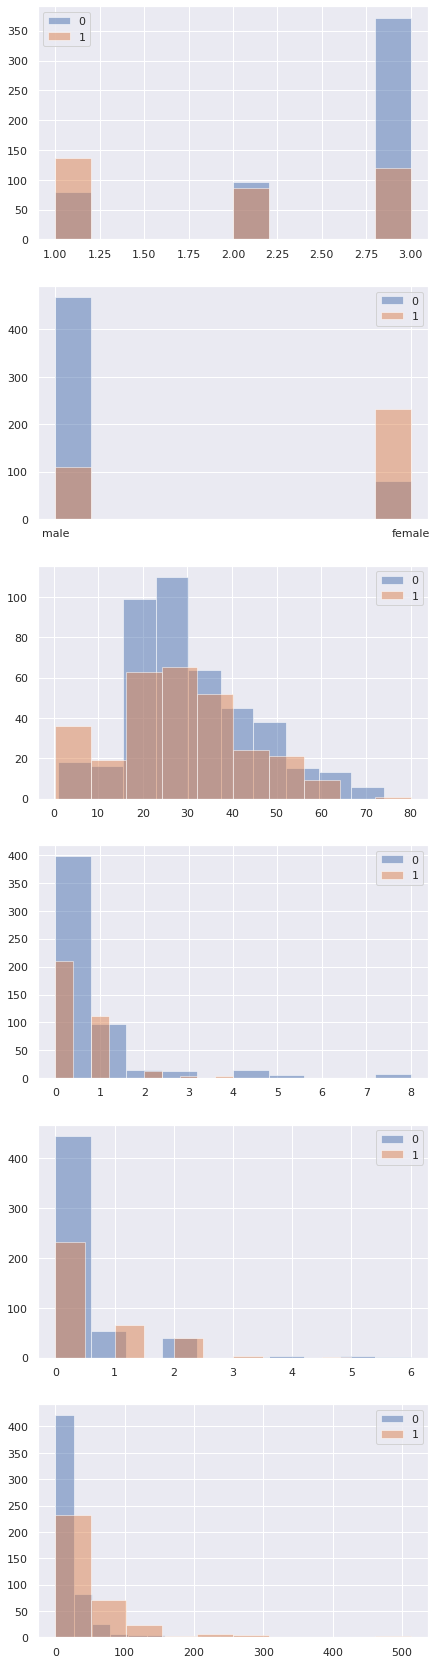

In [2]:
#variables used
hist_vars = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

fig, ax = plt.subplots(6, figsize=(7, 30))
classes = set(data_train['Survived'])
for i, class_ in enumerate(classes):
    class_df = data_train.query('Survived == @class_')
    for j, vars_ in enumerate(hist_vars):
        ax[j].hist(class_df[vars_], alpha = 0.5, label = class_)
        ax[j].legend()

# Filling a NaNs

In [3]:
data_train.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
#fill in Age with mean value by Sex
data_train['Age'] = data_train.groupby("Sex").transform(lambda x: x.fillna(x.mean()))['Age']
#fill in Embarked with most frequent value
most_frequent = data_train.groupby(["Embarked"])['PassengerId'].value_counts().index[0][0]
data_train["Embarked"].fillna(most_frequent, inplace = True)
#fill in Age and Fare with mean value by Sex (for test x)
data_test['Age'] = data_test.groupby("Sex").transform(lambda x: x.fillna(x.mean()))['Age']
data_test['Fare'] = data_test.groupby("Sex").transform(lambda x: x.fillna(x.mean()))['Fare']

# data definition and modeling

In [5]:
#variables used in modeling
vars_ = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train = pd.get_dummies(data_train[vars_], columns = ['Sex', 'Embarked'])
y_train = data_train['Survived']
X_test = pd.get_dummies(data_test[vars_], columns = ['Sex', 'Embarked'])

model = RandomForestClassifier(n_estimators = 10, random_state = 0)
grid = GridSearchCV(estimator = model, param_grid = {'max_depth': range(1, 6)}, cv = 10)
grid.fit(X_train, y_train)

predict = grid.predict(X_test)
output = pd.DataFrame({'PassengerId': data_test.PassengerId, 'Survived': predict})
output = output.astype({'Survived': 'int32'})
output.to_csv('pashasherst_submission.csv', index=False)

thank you for watching